## Importing the needed libaries

In [1]:
import csv
import json
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Loading of the data

In [2]:
census_data=pd.read_csv('census06.csv') #CSV file called 'census06.csv' using the pandas library in Python and assigning it
                                        # to a variable called 'census_data'.
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN


## Data Exploration Analysis

In [3]:
census_data.head()#  method is used to display the first 5 rows of the DataFrame stored in the census_data variable. 
                   #This can give you a quick look at the structure of the data and the column names.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


In [4]:
census_data.info() #This method tells us alot of information about our data frame like the shape (rows, columns),
                   #the data type of our features, and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [5]:
census_data.columns #checking out the available columns i

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [6]:
census_data.shape #showing the number of rows and columns in the data-set

(8329, 11)

In [7]:
census_data.describe() #This method is used to generate descriptive statistics of the DataFrame stored in the census_data variable

,House Number
count,8329.000000
mean,29.340737
std,35.744848
min,1.000000
25%,8.000000
50%,19.000000
75%,35.000000
max,207.000000


In [8]:
census_data.dtypes #separating our features into numerical and categorical 

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

## checking for missing values in the data

In [9]:
census_data.isnull().sum() #checking for missing value

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

From the displayed values above , we can see that marital status has 2056 null values ,religion has 2105 null values ,
it is noticed that age, gender and some other columns have empty strings. we will check and clean each columns subsequently.

### Checking and possible cleaning house number column

In [10]:
#using unique function to get clearer view of the 'house number'column
census_data['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

From the above data, we can see that the data series have the same and right dtype, hence is a clean column.

### Checking and possible cleaning of street column

In [11]:
#using unique function to get clearer view of the 'street'column
census_data['Street'].unique()

array(['Scott Dale', 'Lee Shoal', 'Zebra Lodge', 'Holyrood Trace',
       'Edwards Mountain', 'Gold Road', 'Mason Roads', 'Peninsula Drive',
       'Leicesterbail Road', 'Hill Heights', 'Wessex Drive',
       'Pinewood Hills', 'Sheppard Way', 'Cumberlandbin Crescent',
       'Charity Road', 'Allen Mission', 'Wessex Crescent',
       'Bathhouse Fords', 'Spencer Keys', 'Armaghspan Avenue',
       'Landings Camp', 'Clearwater Street', 'Andrews Mill',
       'Hall Island', 'Davies Plains', 'Elvis Extensions',
       'Goldfinch Avenue', 'Edwards Drive', 'Castor Groves',
       'Solstice Lane', 'Dale Road', 'Riley Avenue', 'Bronze Crescent',
       'Elvis Via', 'Bishop Avenue', 'Portsmouth Street', 'Weston Inlet',
       'Guardian Crescent', 'Bathhouse Street', 'Parrot Summit',
       'Elizabeth Springs', 'Johnson Fort', 'Smith Plains', 'Rice Street',
       'Smith Shoal', 'Toucan Divide', 'Taylor Avenue', 'Williams Road',
       'Bronze Greens', 'Column Valley', 'Harrison Street', 'Khan Cre

From the above data, we can see that the data series have the same and right dtype, hence is a clean column.

### Checking and possible cleaning of 'First name' column

In [12]:
census_data['First Name'].unique()  #implemeenting unique function to get clearer view of the 'First Name'column

array(['Maureen', 'Rhys', 'Lorraine', 'Lewis', 'Molly', 'Norman',
       'Sophie', 'Jamie', 'Duncan', 'Natasha', 'Mohamed', 'Debra',
       'Annette', 'Gareth', 'Kyle', 'Alex', 'Denise', 'Brian', 'Tony',
       'Teresa', 'Pauline', 'Elliott', 'Max', 'Stacey', 'Gordon',
       'Kirsty', 'Adrian', 'Josh', 'Helen', 'Joe', 'John', 'Amy',
       'Eleanor', 'Joseph', 'Samuel', 'Stephanie', 'Carl', 'Paige',
       'Owen', 'Elizabeth', 'Robert', 'Alice', 'Derek', 'Frances',
       'Terence', 'Laura', 'Ashley', 'Abigail', 'Ronald', 'Diana', 'Sean',
       'Josephine', 'Diane', 'Philip', 'Caroline', 'Sharon', 'Leon',
       'Kayleigh', 'Francis', 'Janice', 'Jill', 'Adam', 'Jake', 'Liam',
       'Michelle', 'Melissa', 'Clifford', 'Bryan', 'Benjamin', 'Mitchell',
       'Cheryl', 'Bernard', 'Katy', 'Christine', 'Julian', 'Leonard',
       'Malcolm', 'Jacqueline', 'Carol', 'Stuart', 'Jemma', 'Ann',
       'Howard', 'Aimee', 'Sian', 'Clive', 'Jonathan', 'Albert', 'Sylvia',
       'Toby', 'Barry', 'A

From the above data, we can see that the data series have an empty string , so we will clean it up

In [13]:
census_data[census_data['First Name'] == ' '] #checking of Firstname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


In [14]:
census_data.drop([7258],axis=0,inplace=True)#we dropped the row with no first name, as we can not logically place a first name to the rw

In [15]:
census_data[census_data['First Name'] == ' ']#confirmation that the blank first name has been dropped

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Checking and possible cleaning of 'Surname' column

In [16]:
census_data['Surname'].unique() #using unique function to get clearer view of the 'Surname'column

array(['Cox', 'Brown', 'Allen', 'Patel', 'Akhtar', 'Law', 'Walker',
       'Slater', 'Iqbal', 'Hodgson', 'Walker-Iqbal',
       "O'Neill-Walker-Iqbal", 'Ball', 'Smith', 'Hammond', 'Ingram',
       'Taylor', 'Sharp', 'Dennis', 'Robinson', 'Moore', 'Bell',
       'Stevens', 'Hall', 'Todd', 'Webb', 'Bradley', 'Nicholls', 'Gill',
       'Johnson', 'Wilkinson', 'Parkin', 'Barker', 'Murphy', 'Howells',
       'Payne', 'Porter', 'Jackson-Porter', 'Weston', 'West', 'Burrows',
       'Byrne', 'Davies', 'Clarke', 'Young', 'Lewis', 'Jordan', 'Jackson',
       'Whitehouse', 'Norris', 'Wallace', 'Robertson', 'Curtis', 'Miles',
       'Reynolds', 'Ellis', 'Morton', 'Parkes', 'Evans-Morton', 'Lees',
       'Kelly', 'White', 'Kirk', 'Khan', 'Hill', 'Ahmed', 'Wallis',
       'Franklin', 'Fisher', 'Shah', 'Chandler', 'Reeves', 'Day',
       'Arnold', 'Sims', 'Mason', 'Baker', 'Goddard', 'Roberts', 'Barber',
       'Black', 'Sanderson', 'Benson', 'Graham', 'Wong', 'Jenkins',
       'Hayward', 'Phillips',

From the above data, we can see that the data series have the same and right dtype, hence is a clean column.

### Checking and possible cleaning of 'Age' column

In [17]:
census_data['Age'].unique()#implementing unique function to get clearer view of the 'Age'column

array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', ' ', '92',
       '87', '95', '98', '105', '48.65904417229777', '50.65904417229777',
       '12.0', '54.55812337483672', '57.55812337483672', '3.0', '0.0',
       '106', '65.90982310589523', '68.90982310589523', '16.0', '94',

From the data above , we can see that we have an empty strings and floats in our data. so we will clean the column by first filling up the empty string , then we convert our data to integer

In [18]:
census_data[census_data['Age'] == ' ']# checking of age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


In [19]:
census_data.at[2206, 'Age']= 35  #using the mean of the age column which is 35 to replace the empty string 
census_data.at[4317, 'Age']= 35 

In [20]:
census_data[census_data['Age'] == ' '] #checking for any empty string in the age column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


From the above , we can see that empty string has been replaced by the mean , we will now convert any age in float to integer

In [21]:
census_data['Age'] = census_data.Age.astype('float')# Converting any strings under the age column to integer
census_data['Age'] = census_data.Age.astype('int') 

In [22]:
census_data.Age.unique() #checking for any possible float or empty string

array([ 50,  52,  69,  72,  36,  42,  38,   7,  29,  32,  62,  80,  56,
        55,  25,  17,  63,  23,  22,  39,  41,   2,   1,  67,  65,  28,
        27,   5,   4,   3,  20,  19,  49,  83,  14,  66,  82,  44,  15,
        21,  46,  45,  43,  64,  59,  34,  10,   9,  35,   0,  68,  48,
        16,  81,  53,   8,  40,  51,  54,  58,  13,  61,  26,  47,  74,
        79,  75,  70,  71, 102,  73,  24,  60,  30,  33,  11,  31,  18,
        37,  12,   6,  57,  89,  85,  78,  88,  91,  93,  97,  86,  77,
        90,  76, 104,  84,  92,  87,  95,  98, 105, 106,  94, 101,  99])

In [23]:
census_data["Age"].dtypes#age now in integer

dtype('int32')

From the above Age column, our data series under the Age column has been cleaned 

### Checking and possible cleaning of 'Relationship to Head of House' column

In [24]:
census_data['Relationship to Head of House'].unique()

array(['Head', 'Partner', 'Husband', 'Son', 'None', 'Daughter', 'Wife',
       'Grandson', 'Lodger', 'Visitor', 'Cousin', 'Step-Son', 'Sibling',
       'Granddaughter', 'Step-Daughter', 'Adopted Son', 'Nephew',
       'Adopted Daughter', 'Son-in-law', 'Neice', 'Daughter-in-law',
       'Adopted Grandson', 'Adopted Granddaughter'], dtype=object)

From the above we can see that the data series is clean and of the same dtype

### Checking and possible cleaning of 'Marital Status' column

In [25]:
census_data['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed', ' '], dtype=object)

From the data above , we can see that we have an empty strings
so we will clean the column by first filling up the empty string.

In [26]:
# count check on Gender
census_data["Marital Status"].value_counts()

Single      2941
Married     2224
Divorced     744
Widowed      360
               3
Name: Marital Status, dtype: int64

In [27]:
#checking of marital status
census_data[census_data['Marital Status'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


In [28]:
census_data.at[4328, 'Marital Status']= 'Married' #A doctor , head of the relationship with family members and hopsital doctor,hence we replaced it with married
census_data.at[7103, 'Marital Status']= 'Single'  # Still a student with a young age of 19 with no house relationship, hence we replaced with single
census_data.at[7460, 'Marital Status']= 'Single'  #Still a student with a young age of 19 with no house relationship, hence we replaced with single

In [29]:
census_data[census_data['Marital Status'] == ' '] #checking for any empty string in the marital column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


From the above , we can see that the empty marital status has been assigned values, hence no more empty strings

In [30]:
census_data["Marital Status"].value_counts()# counts check on marital status

Single      2943
Married     2225
Divorced     744
Widowed      360
Name: Marital Status, dtype: int64

In [31]:
census_data.loc[census_data['Age']<18,'Marital Status']='Below Age'#Changing the Marital status of kids in the data set to 'Below age'

In [32]:
census_data.isnull().sum() #checking for missing value

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

In [33]:
# counts check on marital status
census_data["Marital Status"].value_counts()

Single       2943
Married      2223
Below Age    2058
Divorced      744
Widowed       360
Name: Marital Status, dtype: int64

In [34]:
census_data['Marital Status'].unique() #Reconfirming for any missing value in the marital status

array(['Single', 'Married', 'Divorced', 'Below Age', 'Widowed'],
      dtype=object)

From the Marital status data above ,the data has been cleaned now and the empty strings have been replaced , while the nan with age values less than 18years have been replaced with 'underage'.

### Checking and possible cleaning of 'Gender' column

In [35]:
census_data['Gender'].unique()#checking the unique values of the gender column

array(['Female', 'Male'], dtype=object)

In [36]:
census_data["Gender"].value_counts() # count check on Gender

Female    4302
Male      4026
Name: Gender, dtype: int64

From the above data , we can see that the gender column is okay

### Checking and possible cleaning of 'Occupation' column

In [37]:
census_data['Occupation'].unique()

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

In [38]:
census_data["Occupation"].value_counts()# count check on Gender

Student                                         1669
University Student                               559
Unemployed                                       513
Child                                            500
Secretary, company                                16
                                                ... 
Retired Immunologist                               1
Retired Furniture designer                         1
Hydrogeologist                                     1
Retired Engineering geologist                      1
Retired Control and instrumentation engineer       1
Name: Occupation, Length: 1058, dtype: int64

From the above data , we can see that the 'Occupation' column is okay

### Checking and possible cleaning of 'Infirmity' column

In [39]:
census_data['Infirmity'].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', ' ', 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

In [40]:
census_data["Infirmity"].value_counts()# counts check on Infirmity

None                   8260
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
                          8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [41]:
census_data[census_data['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
344,29,Gold Road,Joanna,Francis,65,Head,Single,Female,Clothing/textile technologist,,Christian
462,13,Peninsula Drive,Lucy,Graham-Rogers,0,Daughter,Below Age,Female,Child,,NaN
1284,182,Wessex Drive,Susan,Mills,50,Head,Single,Female,International aid/development worker,,Christian
1587,9,Charity Road,Stewart,Brown,3,Son,Below Age,Male,Child,,NaN
1630,18,Charity Road,Jade,Holmes,50,Head,Married,Female,Amenity horticulturist,,None
1665,22,Charity Road,Adrian,Turner,6,Son,Below Age,Male,Student,,NaN
7030,8,Naylor Crescent,Olivia,Porter,22,Head,Single,Female,University Student,,None
8101,54,Kestrel Flat,Elizabeth,Singh,43,Head,Married,Female,Trading standards officer,,Christian


From the data above ,we can see that we have an empty strings ,so we will clean the column by setting the empty strings to 'Unknown Infection' since they are unknown

In [42]:
census_data['Infirmity'].replace(' ', value = 'Unknown Infection', inplace= True )#replacing empty string with unknown infection, as thats the best category to place it since it is unknown 

In [43]:
census_data[census_data['Infirmity'] == ' '] #checking for any empty string in the infirmity column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [44]:
census_data["Infirmity"].value_counts()

None                   8260
Physical Disability      17
Unknown Infection        16
Mental Disability        13
Blind                    10
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

### Checking and possible cleaning of 'Religion' column

In [45]:
census_data['Religion'].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', ' ', 'Quaker'], dtype=object)

In [46]:
# counts check on Religion
census_data["Religion"].value_counts()

None         2799
Christian    1781
Catholic      881
Methodist     547
Muslim        115
Sikh           55
Jewish         38
                4
Quaker          2
Buddist         1
Name: Religion, dtype: int64

In [47]:
census_data[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,


From the data above ,we can see that we have an empty strings ,so we will clean the column 

In [48]:
census_data.at[7573, 'Religion']= 'Methodist'#Replaced one empty cell with methodist because the family head is a methodist

In [49]:
census_data[census_data['Religion'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,


Having replaced Mohammed Stephens missing religion wih Methodist because the family head is a methodist, we wil now replace the other remaining three empty strings with Unknown

In [50]:
census_data['Religion'].replace(' ', value = 'Unknown', inplace= True )#replacing the remaining empty string with unknown, since we can not establish the connection to fix the religion

In [51]:
census_data[census_data['Religion'] == ' '] #checking for any empty string in the Religion column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [52]:
census_data["Religion"].replace(np.nan, "None", inplace = True) #Changing the values that has NA in the Religion column to None , so set all NA to 'None'
census_data["Religion"].replace(np.nan, "None", inplace = True)

In [53]:
census_data["Religion"].value_counts()# counts check on Religion

None         4904
Christian    1781
Catholic      881
Methodist     548
Muslim        115
Sikh           55
Jewish         38
Unknown         3
Quaker          2
Buddist         1
Name: Religion, dtype: int64

In [54]:
census_data.isnull().sum() #checking for any missing value

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [55]:
census_data['Religion'].unique()#checking the unique values of the religion column

array(['Catholic', 'Methodist', 'None', 'Christian', 'Sikh', 'Muslim',
       'Jewish', 'Buddist', 'Unknown', 'Quaker'], dtype=object)

### DATA VISUALIZATION AND ANALYSIS

In [56]:
census_data.dtypes #displaying of the dataframe data types

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int32
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [57]:
census_data.info()#displaying of the dataframe info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8328 non-null   int64 
 1   Street                         8328 non-null   object
 2   First Name                     8328 non-null   object
 3   Surname                        8328 non-null   object
 4   Age                            8328 non-null   int32 
 5   Relationship to Head of House  8328 non-null   object
 6   Marital Status                 8328 non-null   object
 7   Gender                         8328 non-null   object
 8   Occupation                     8328 non-null   object
 9   Infirmity                      8328 non-null   object
 10  Religion                       8328 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 1006.3+ KB


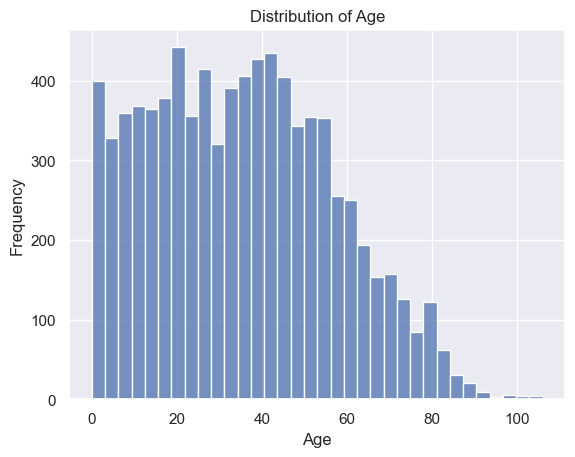

In [58]:
#plotting the histogram
#ax=sns.histplot(census_data, x = 'Age', binwidth = 3)
sns.histplot(data = census_data, x = "Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
# plt.show()

plt.savefig("age_histogram.png")

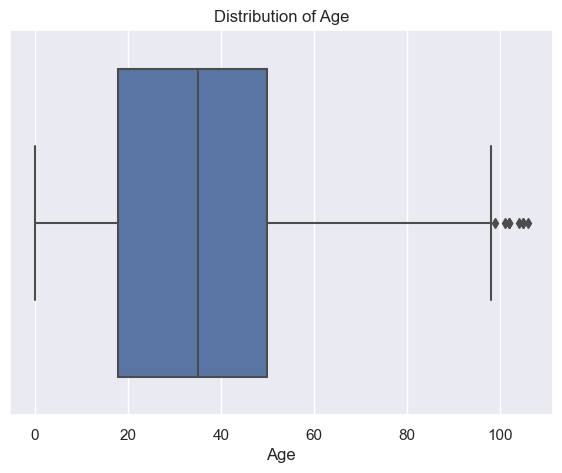

In [59]:

# Now we have to Set the figure size at once
fig, ax = plt.subplots(figsize=(7, 5))
# Now, we Create a boxplot of the 'Age' column in the 'census' DataFrame using seaborn
sns.boxplot(x=census_data['Age'], ax=ax)

# Now ,we Set the axis labels and title at once
ax.set_xlabel('Age')
ax.set_title('Distribution of Age')

# Save the plot as a PNG file with the filename "age_box.png"
plt.savefig("age_box.png", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, np.inf]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100+']
census_data['Age Range'] = pd.cut(census_data['Age'], bins=bins, labels=labels)
#Here, we define the bin edges and the corresponding labels for each age group using bins and labels respectively. 
#Then, we apply the cut() function to the 'Age' column of census_data using these bins and labels to create the 
#'Age Range' column. The resulting DataFrame will have the same information as the original one.

In [61]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,45-49
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,50-54
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,65-69
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,70-74
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim,55-59
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian,40-44
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian,40-44
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Below Age,Female,Child,None,None,NaN


In [62]:
gender_age_counts = census_data.groupby(['Gender', 'Age Range']).size().unstack(level=-1, fill_value=0)
range_of_male_age = gender_age_counts.loc['Male']  #we extract the 'Male' and 'Female' columns from this DataFrame using .loc[] and store them in range_of_male_age and
#range_of_female_age, respectively.
range_of_female_age = gender_age_counts.loc['Female']

In [63]:
range_of_male_age

Age Range
0-4      260
5-9      314
10-14    305
15-19    348
20-24    295
25-29    249
30-34    276
35-39    316
40-44    330
45-49    285
50-54    245
55-59    208
60-64    180
65-69    121
70-74    100
75-79     59
80-84     59
85-89     20
90-94      9
95-99      1
100+       3
Name: Male, dtype: int64

In [64]:
range_of_female_age

Age Range
0-4      261
5-9      299
10-14    293
15-19    327
20-24    329
25-29    249
30-34    349
35-39    398
40-44    384
45-49    319
50-54    246
55-59    220
60-64    172
65-69    142
70-74    109
75-79     81
80-84     49
85-89     18
90-94      3
95-99      4
100+       5
Name: Female, dtype: int64

In [65]:
Age_range = pd.concat([range_of_male_age, range_of_female_age], axis=1).assign(Total=lambda x: x.sum(axis=1))
Age_range['Female'] *= -1
#first we use pd.concat() to concatenate the 'range_of_male_age' and 'range_of_female_age' Series along the columns axis.
#We then use the .assign() method to add a new 'Total' column to the resulting DataFrame by calling the sum() method along the
#columns axis.
#we multiply the 'Female' column by -1 to flip the sign and make the bar plot look like a population pyramid.

In [66]:
Age_range

,Male,Female,Total
Age Range,,,
0-4,260,-261,521
5-9,314,-299,613
10-14,305,-293,598
15-19,348,-327,675
20-24,295,-329,624
25-29,249,-249,498
30-34,276,-349,625
35-39,316,-398,714
40-44,330,-384,714


In [67]:
Age_range['Total'].diff()

Age Range
0-4        NaN
5-9       92.0
10-14    -15.0
15-19     77.0
20-24    -51.0
25-29   -126.0
30-34    127.0
35-39     89.0
40-44      0.0
45-49   -110.0
50-54   -113.0
55-59    -63.0
60-64    -76.0
65-69    -89.0
70-74    -54.0
75-79    -69.0
80-84    -32.0
85-89    -70.0
90-94    -26.0
95-99     -7.0
100+       3.0
Name: Total, dtype: float64

In [68]:
collated_data = pd.DataFrame({
    'Male': range_of_male_age,# male column created
    'Female':-1 *  range_of_female_age #female column created by multiplying by -1, indicating the ages of the female are inverted
})


In [69]:
collated_data.index.names = ['Age_distribution']
collated_data.reset_index(inplace=True)

In [70]:
collated_data

,Age_distribution,Male,Female
0,0-4,260,-261
1,5-9,314,-299
2,10-14,305,-293
3,15-19,348,-327
4,20-24,295,-329
5,25-29,249,-249
6,30-34,276,-349
7,35-39,316,-398
8,40-44,330,-384
9,45-49,285,-319


In [71]:
distribution_list=['100+','95-99', '90-94', '85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

Text(0.5, 0, 'population count')

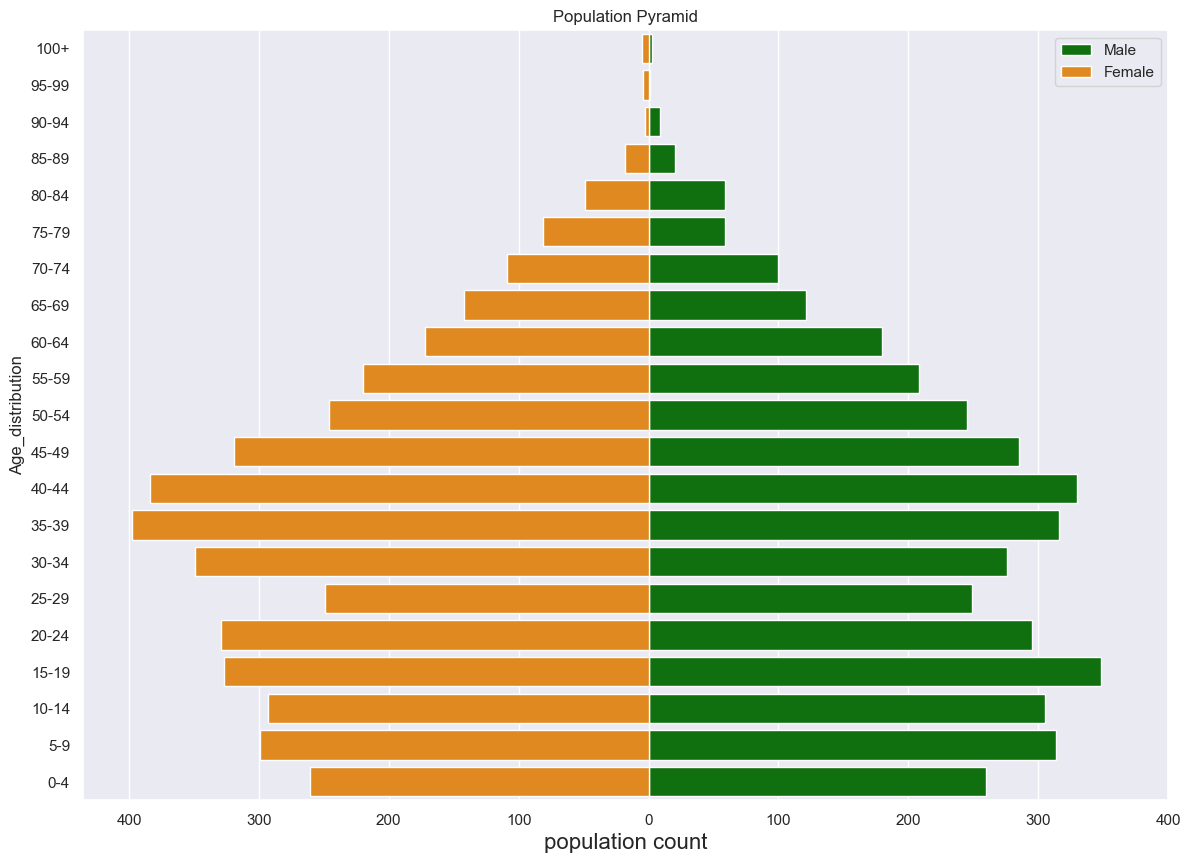

In [72]:
plt.figure(figsize=(14,10))
age_pyramid = sns.barplot(x='Male', y='Age_distribution', data=collated_data, color=('green'), order=distribution_list, label='Male') 
 
age_pyramid = sns.barplot(x='Female', y='Age_distribution', data=collated_data, color=('darkorange'), order=distribution_list, label='Female') 
age_pyramid.set(xlabel="(Population (Count)", ylabel="Age_distribution", title = "Population Pyramid")
age_pyramid.legend() 
plt.title('Population Pyramid')
xticks= [-400,-300,-200,-100, 0,100,200,300, 400,]
plt.xticks(xticks, labels=np.abs(xticks))
plt.xlabel('population count', fontsize=16)

### Birth rate calculation per 1000 per year:

In [73]:
Number_of_births = census_data[census_data['Age'] == 0]['Age'].count()


In [74]:
# #we will calculate the number of births with the first two age ranges
# #Age range   count
# #(0-5)       =521 
# #(6-11)      =613.
# Number_of_births = 613-521

In [75]:
Number_of_births


88

In [76]:
Birth_rate = Number_of_births /len(census_data)*1000


In [77]:
Birth_rate

10.566762728146013

In [78]:
# Using 82years as the life expectancy of the people in UK , we will now calculate the death rate with two ranges 

#Age range    count
#(78-83)     =263 
#(84-89)     =209.
Number_of_deaths =263-209

In [79]:
Number_of_deaths

54

In [80]:
Death_rate=Number_of_deaths*1000/len(census_data)/5# calculating death rate per 1000

In [81]:
Death_rate

1.296829971181556

In [82]:
Growth_rate= Birth_rate-Death_rate

In [83]:
print(f'The growth rate per one thousand is {Growth_rate}')

The growth rate per one thousand is 9.269932756964458


### Unemployment rate calculation per 1000 population per year

In [84]:
unemployed_population = census_data[census_data['Occupation'] == 'Unemployed']
#people above 65 are assumed to be retired as observeed in the UK
unemployed_population = unemployed_population[unemployed_population['Age'] < 65]

In [85]:
unemployed_population

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
53,22,Scott Dale,Norman,Nicholls,23,Head,Single,Male,Unemployed,None,Catholic,20-24
75,2,Lee Shoal,Clifford,Porter,49,Husband,Married,Male,Unemployed,None,Christian,45-49
102,14,Lee Shoal,Barry,Taylor,63,Head,Single,Male,Unemployed,None,None,60-64
103,15,Lee Shoal,Alison,Miles,39,Head,Single,Female,Unemployed,None,Methodist,35-39
109,17,Lee Shoal,Aaron,Lees,36,Head,Single,Male,Unemployed,None,None,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
8260,1,Wilson Castle,Trevor,Price,49,Cousin,Single,Male,Unemployed,None,Christian,45-49
8275,1,Stephens Factory,Georgia,Bennett,43,Wife,Married,Female,Unemployed,None,Catholic,40-44
8285,1,Dublin House,Gareth,Hill,40,Partner,Single,Male,Unemployed,None,None,35-39
8293,1,Faith Bastion,Emma,Lawson,50,Head,Married,Female,Unemployed,None,None,45-49


In [86]:
census_data["Occupation"].unique() #checking the unique values of the ocuupation column 

array(['Engineer, building services', 'Engineer, mining', 'Unemployed',
       ..., 'Retired Multimedia programmer',
       'Retired Commercial/residential surveyor',
       'Retired Control and instrumentation engineer'], dtype=object)

In [87]:
census_data["Occupation"].value_counts(normalize=True)*100 #displaaying the respective percentages that make up the occupation column

Student                                         20.040826
University Student                               6.712296
Unemployed                                       6.159942
Child                                            6.003842
Secretary, company                               0.192123
                                                  ...    
Retired Immunologist                             0.012008
Retired Furniture designer                       0.012008
Hydrogeologist                                   0.012008
Retired Engineering geologist                    0.012008
Retired Control and instrumentation engineer     0.012008
Name: Occupation, Length: 1058, dtype: float64

In [88]:
#unmployment rate calculation (unemployment per 1,000 population per year)

unemployment_rate = len(unemployed_population) * 1000/ len(census_data)

unemployment_rate

56.67627281460135

In [89]:
#Getting the unemployment rate calculation
percentage_unemployment = round(len(unemployed_population) * 100/ len(census_data),2)

print(f"The unemployment percentage is {percentage_unemployment}%")

The unemployment percentage is 5.67%


Text(0, 0.5, 'Unemployment Rate')

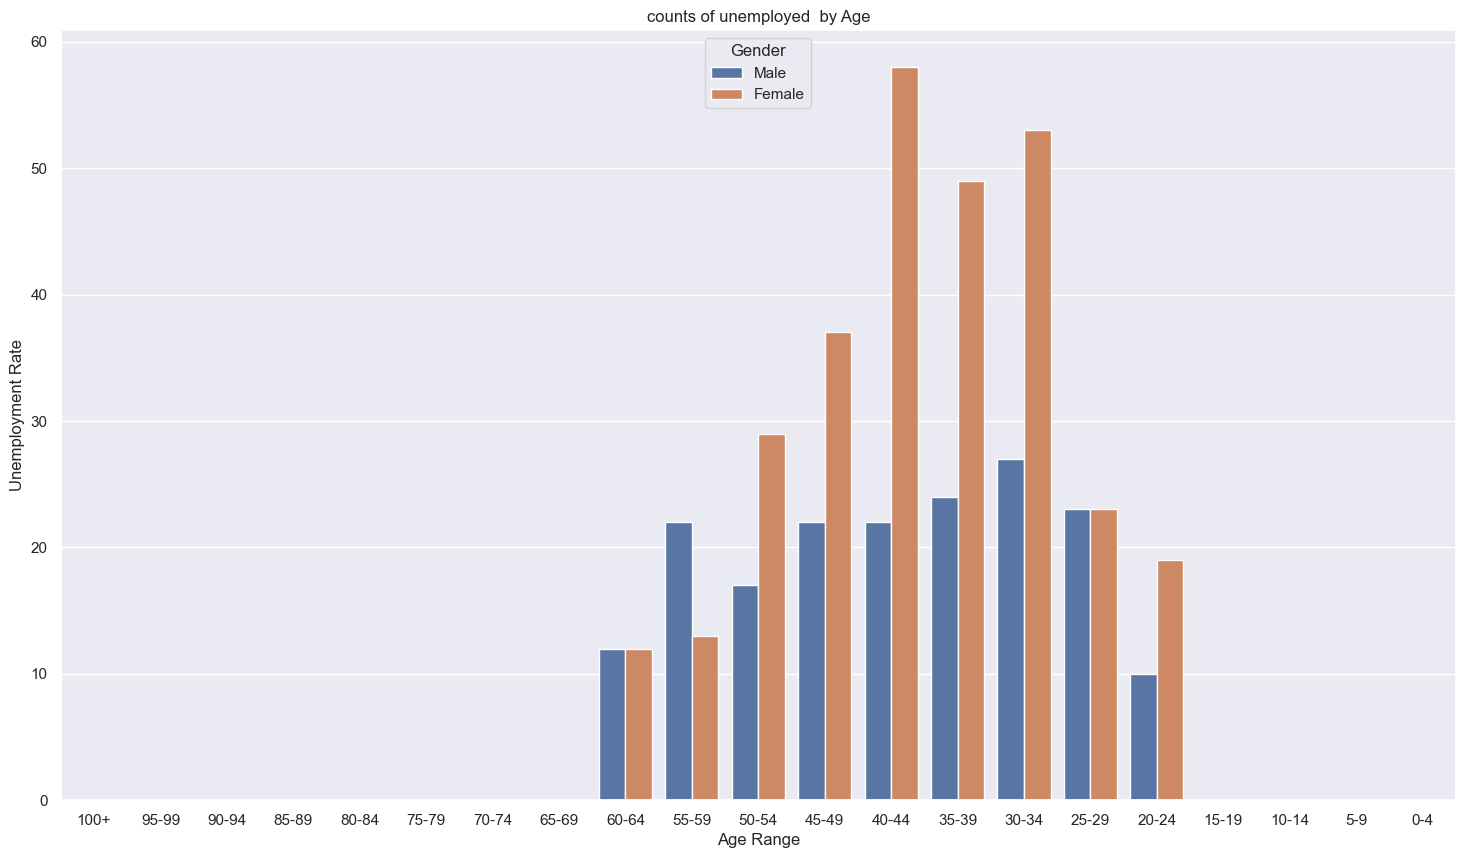

In [90]:
plt.figure(figsize= (18,10))

unemployment_plot = sns.countplot(data = unemployed_population, x = 'Age Range', order=distribution_list, hue = 'Gender'  )
unemployment_plot.set_title('counts of unemployed  by Age')
unemployment_plot.set_ylabel('Unemployment Rate')

## Immigration rate calculation  per 1000 population per year

From the data set, we are using the lodgers and the visitors 

In [91]:
immigrants = census_data[((census_data['Relationship to Head of House'] == 'Visitor')| (census_data['Relationship to Head of House']=='Lodger'))]
immigrants = len(immigrants)

In [92]:
immigration_rate = immigrants * 1000/ len(census_data)
immigration_rate

51.99327569644573

#### Calculating the immigration percentage of the population:

In [93]:
percentage_immigration = round((immigrants) * 100/ len(census_data),2)

print(f" The immigration rate percentage is {percentage_immigration}%")

 The immigration rate percentage is 5.2%


In [94]:
Number_of_Male_divorcees=299
Number_of_Female_divorcees=445
Divorcees_difference=Number_of_Female_divorcees-Number_of_Male_divorcees
Divorcees_difference

146

In [95]:
Emigration_rate= Divorcees_difference*1000/len(census_data)
Emigration_rate

17.531219980787704

#### Calculating the emigration percentage of the population:

In [96]:
percentage_emigration = round((Emigration_rate) * 1000/ len(census_data),2)

print(f" The emigration rate percentage is {percentage_emigration}%")

 The emigration rate percentage is 2.11%


### Marriage rate calculation per 1,000 population per year

In [97]:
marriage = census_data[census_data['Marital Status'] == 'Married']

Marriage_rate = len(marriage) * 1000/ len(census_data)
Marriage_rate

266.9308357348703

In [98]:
census_data[census_data['Marital Status'] == 'Married']['Marital Status'].count()

2223

In [99]:
percentage_marriage_rate = round(len(marriage) * 100/ len(census_data),2)
print(f" The marriage percentage rate is {percentage_marriage_rate}%")

 The marriage percentage rate is 26.69%


Text(0.5, 1.0, 'Marital status')

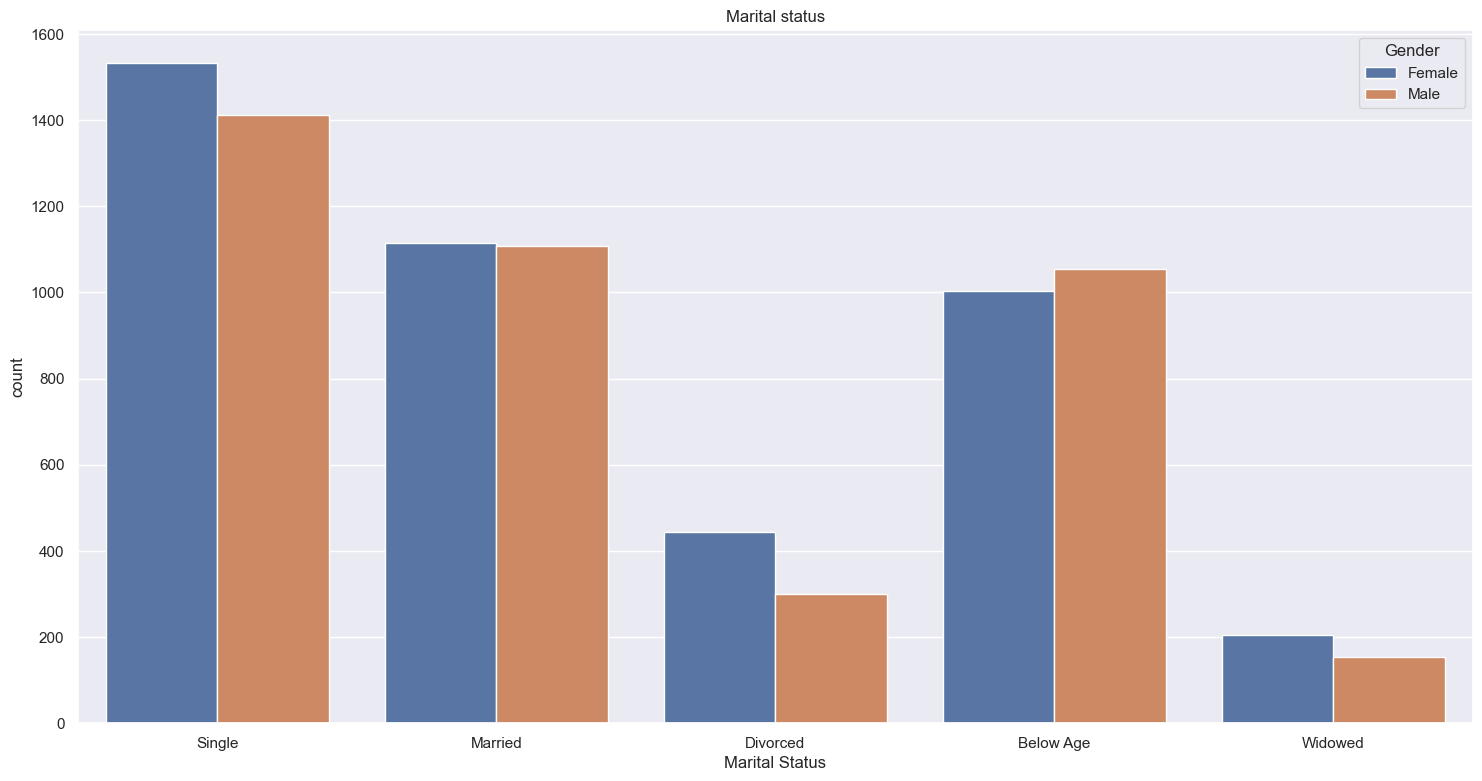

In [100]:
plt.figure(figsize= (18,9))
marriage_plot = sns.countplot(data = census_data, x = 'Marital Status', hue = 'Gender' )
marriage_plot.set_title  ('Marital status')

From the above graph , we can see that there are more single people in the population than any other marital status

In [101]:
census_data["Marital Status"].value_counts(normalize=True)*100

Single       35.338617
Married      26.693084
Below Age    24.711816
Divorced      8.933718
Widowed       4.322767
Name: Marital Status, dtype: float64

#### Grouping the dataframe by marital status and gender

In [102]:
grouped = census_data.groupby(['Marital Status', 'Gender']).size().reset_index(name='count')
# pivot the table to create a separate column for male and female counts
pivoted = grouped.pivot(index='Marital Status', columns='Gender', values='count').reset_index()
# calculate the female-to-male ratio for each marital status group
pivoted['Female-to-Male Ratio'] = pivoted['Female'] / pivoted['Male']
print(pivoted)

Gender Marital Status  Female  Male  Female-to-Male Ratio
0           Below Age    1004  1054              0.952562
1            Divorced     445   299              1.488294
2             Married    1115  1108              1.006318
3              Single    1532  1411              1.085755
4             Widowed     206   154              1.337662


### Divorce rate calculation per 1,000 population per year

In [103]:
divorce = census_data[census_data['Marital Status'] == 'Divorced']

In [104]:
#getting the total number of divorce
len(divorce)

744

In [105]:
#Calculating divorce rate (divorce per 1,000 population per year)
Divorce_rate = len(divorce)* 1000/ len(census_data)
Divorce_rate

89.33717579250721

#### Calculating the divorce rate percentage of the population

In [106]:
Divorce_rate_percentage = round(len(divorce)* 100/ len(census_data),2)

print(f" The divorce rate percentage is {Divorce_rate_percentage}%")

 The divorce rate percentage is 8.93%


Text(0.5, 1.0, 'Divorce Count by Age')

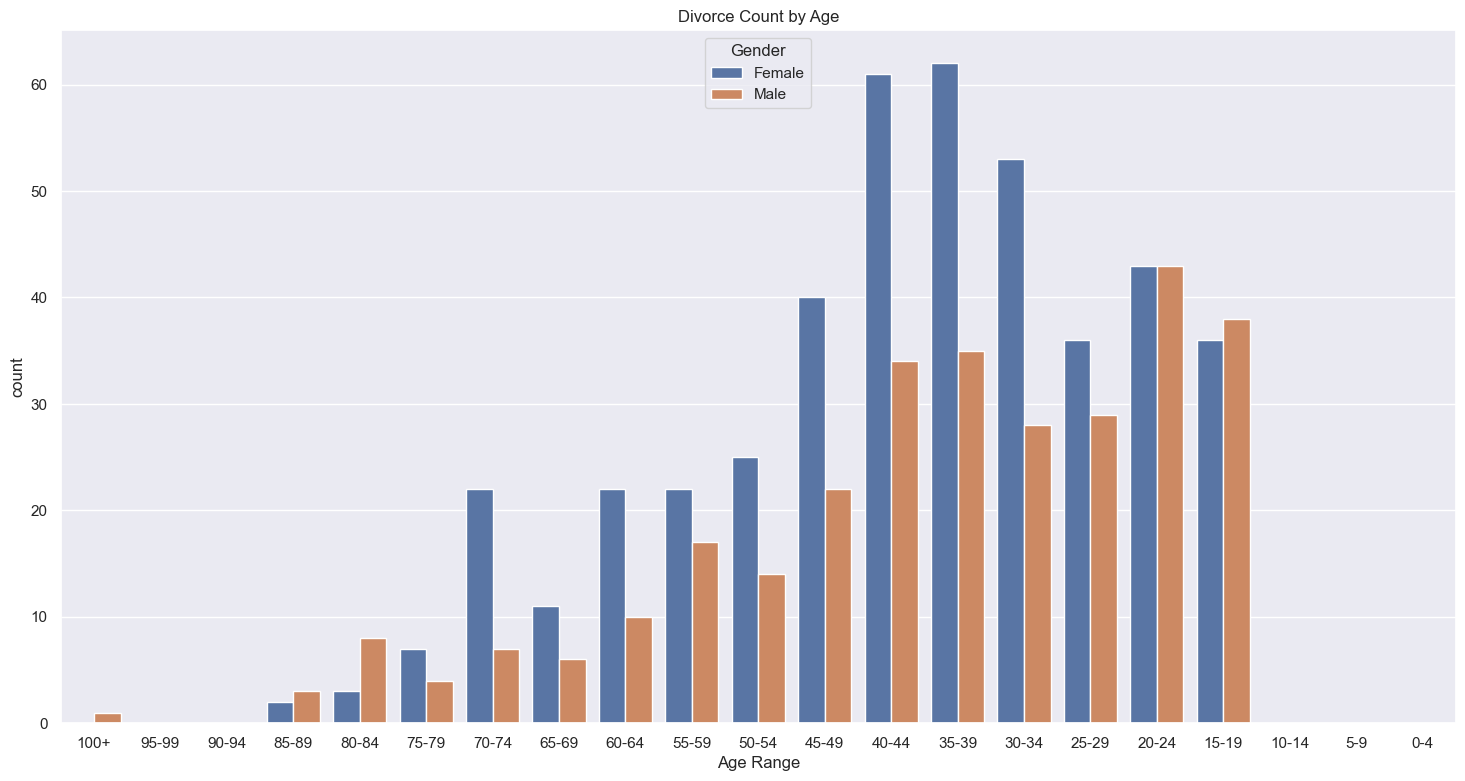

In [107]:
plt.figure(figsize= (18,9))
divorce_plot = sns.countplot(data = divorce, x = 'Age Range', order=distribution_list, hue = 'Gender' )
divorce_plot.set_title  ('Divorce Count by Age')

From the graph we can see that age-range  of 35-39 has the highest number of divorce rate, and the females are more divorced than the males

## RELIGION CALCULATION

In [108]:
census_data['Religion'].value_counts()

None         4904
Christian    1781
Catholic      881
Methodist     548
Muslim        115
Sikh           55
Jewish         38
Unknown         3
Quaker          2
Buddist         1
Name: Religion, dtype: int64

#### Calculating the mean age for each religion 

In [109]:
for i in census_data['Religion'].unique():
    avg = census_data['Age'][census_data['Religion'] == i].mean()
    print(f'{i}:  {avg}')

Catholic:  42.79568671963678
Methodist:  44.16240875912409
None:  27.595024469820554
Christian:  49.760247052217856
Sikh:  34.29090909090909
Muslim:  36.21739130434783
Jewish:  46.8421052631579
Buddist:  32.0
Unknown:  44.333333333333336
Quaker:  21.5


#### Now we calculate the modal age for each religion 

In [110]:
for i in census_data['Religion'].unique():
    mode = census_data['Age'][census_data['Religion'] == i].mode()[0].round(3)
    print(f'{i}:  {mode}')

Catholic:  44
Methodist:  40
None:  14
Christian:  53
Sikh:  24
Muslim:  29
Jewish:  44
Buddist:  32
Unknown:  23
Quaker:  20


#### Now calculating the median age for each religion

In [111]:
for i in census_data['Religion'].unique():
    median = census_data['Age'][census_data['Religion'] == i].median()
    print(f'{i}:  {median}')

Catholic:  42.0
Methodist:  42.0
None:  22.0
Christian:  51.0
Sikh:  31.0
Muslim:  31.0
Jewish:  44.0
Buddist:  32.0
Unknown:  25.0
Quaker:  21.5


In [112]:
census_data["Religion"].value_counts(normalize=True)*100

None         58.885687
Christian    21.385687
Catholic     10.578770
Methodist     6.580211
Muslim        1.380884
Sikh          0.660423
Jewish        0.456292
Unknown       0.036023
Quaker        0.024015
Buddist       0.012008
Name: Religion, dtype: float64

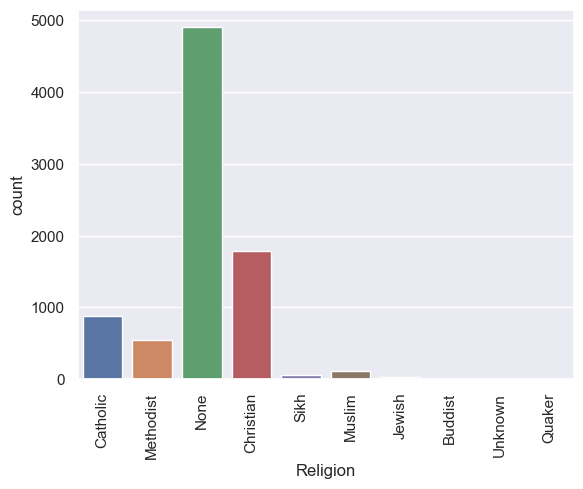

In [113]:
sns.countplot(data = census_data, x = "Religion")
plt.xticks(rotation = 90);

Text(0.5, 1.0, 'Religion distribution')

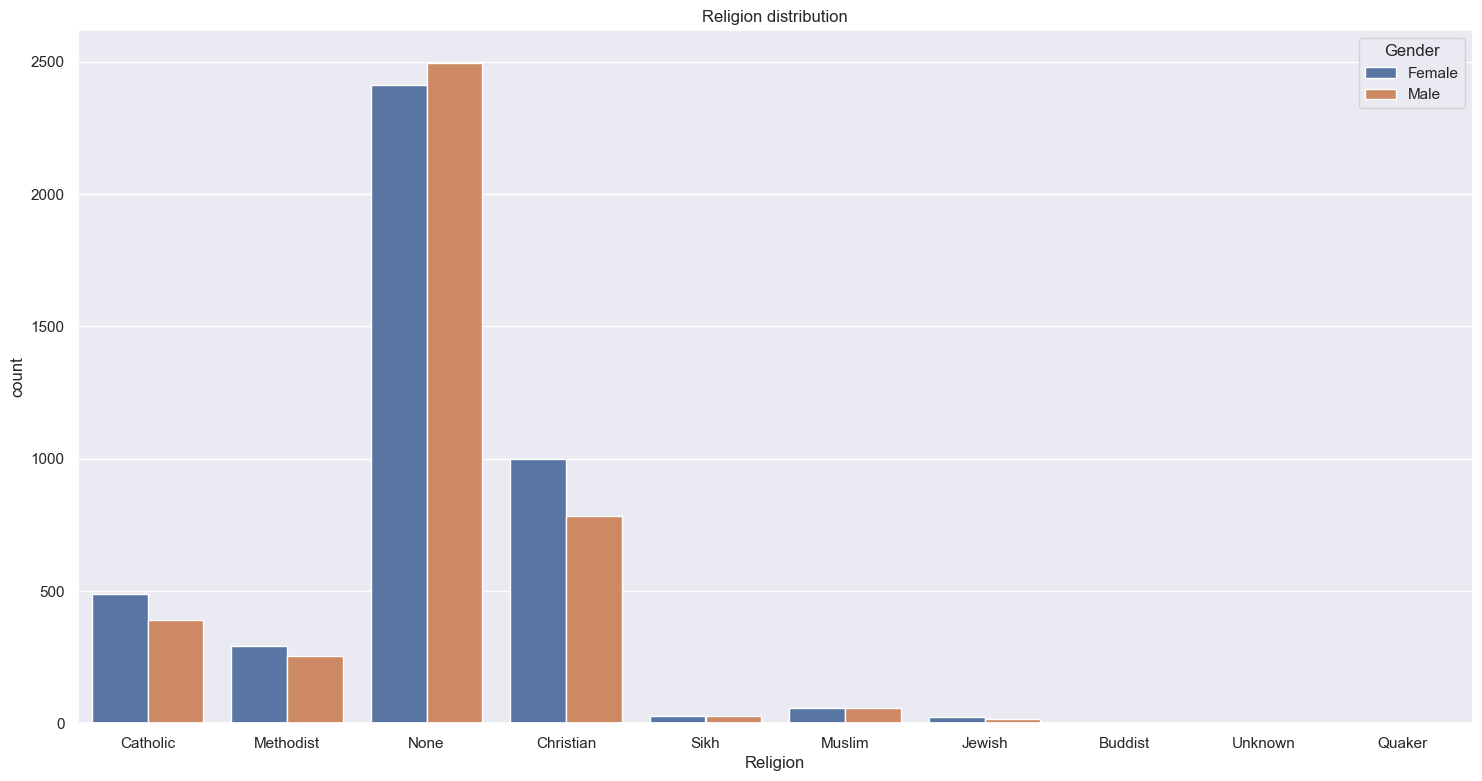

In [114]:
plt.figure(figsize= (18,9))
marriage_plot = sns.countplot(data = census_data, x = 'Religion', hue = 'Gender' )
marriage_plot.set_title  ('Religion distribution')

Text(0.5, 1.0, 'Religion Distrbution By Age')

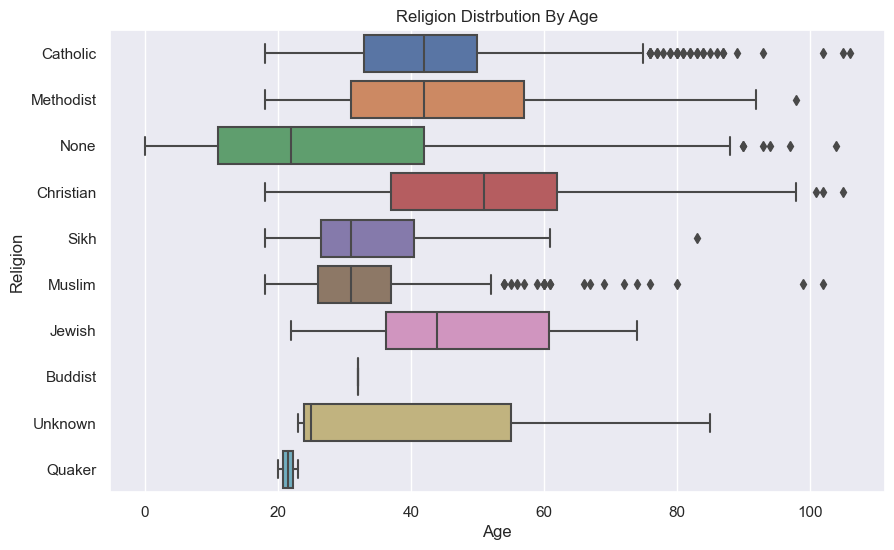

In [115]:
plt.figure(figsize=(10,6))
religion_plot = sns.boxplot(y ='Religion', x = 'Age', data = census_data)
religion_plot.set_title ('Religion Distrbution By Age')

 ###  INFIRMITY CALCULATION

In [116]:
census_data['Infirmity'].value_counts() #Count of values under the infirmity column

None                   8260
Physical Disability      17
Unknown Infection        16
Mental Disability        13
Blind                    10
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [117]:
census_data["Infirmity"].value_counts(normalize=True)*100 #percentage composition of the infirmity

None                   99.183477
Physical Disability     0.204131
Unknown Infection       0.192123
Mental Disability       0.156100
Blind                   0.120077
Deaf                    0.096061
Disabled                0.048031
Name: Infirmity, dtype: float64

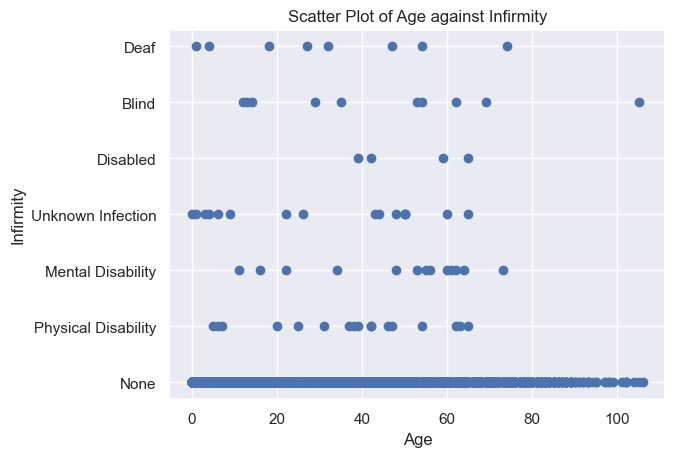

In [118]:
x = census_data["Age"]
y = census_data["Infirmity"]
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Infirmity")
plt.title("Scatter Plot of Age against Infirmity")
plt.show()

scatterplot graph above shows that aged peopleover 80years are really not affected by the infirmity as we have only one case of bind person over 80years

Text(0.5, 1.0, 'Infirmity Distrbution By Age')

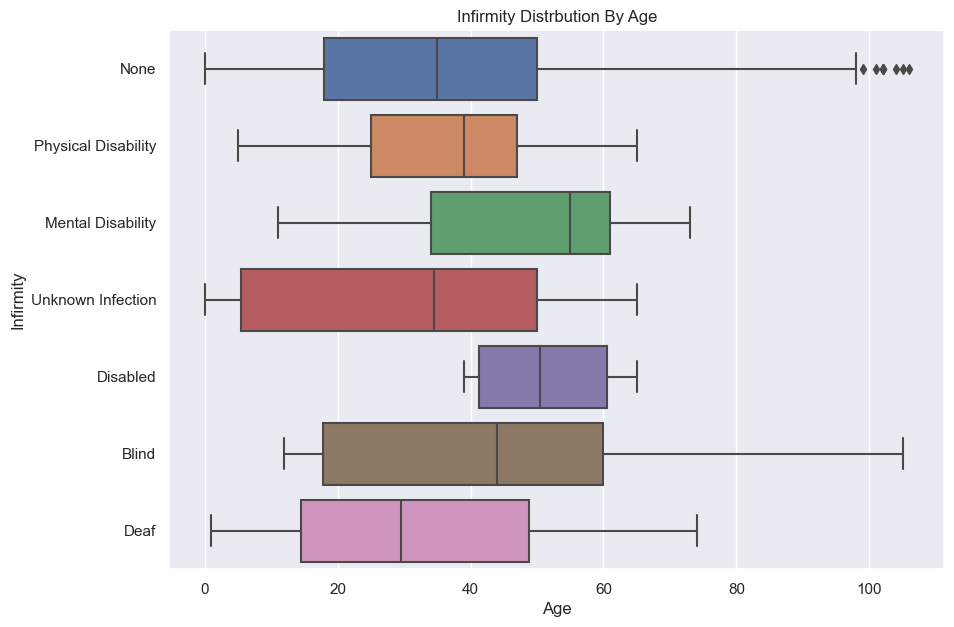

In [119]:
plt.figure(figsize=(10,7))
Infirmity_plot = sns.boxplot(y ='Infirmity', x = 'Age', data = census_data)
Infirmity_plot.set_title ('Infirmity Distrbution By Age')

From the above boxplot , shows that the majority of the infirmity were noticed on the younger age range

### OCCUPANCY CALCULATION

In [120]:
ax=census_data.groupby(['House Number','Street'])
home_occupancy=ax.size().reset_index(name='occupants')
home_occupancy

,House Number,Street,occupants
0,1,Alba Crescent,2
1,1,Allen Mission,1
2,1,Andrews Mill,4
3,1,Armaghspan Avenue,1
4,1,Bangorthorpe Avenue,2
...,...,...,...
2819,203,Wessex Drive,1
2820,204,Wessex Drive,2
2821,205,Wessex Drive,1
2822,206,Wessex Drive,4


In [121]:
home_occupancy.describe() #showing an appproximately 3persons per house , which depicts not crowded

,House Number,occupants
count,2824.000000,2824.000000
mean,29.295326,2.949008
std,34.552643,2.045589
min,1.000000,1.000000
25%,9.000000,2.000000
50%,19.000000,2.000000
75%,35.000000,4.000000
max,207.000000,22.000000


Text(0.5, 1.0, 'occupants count')

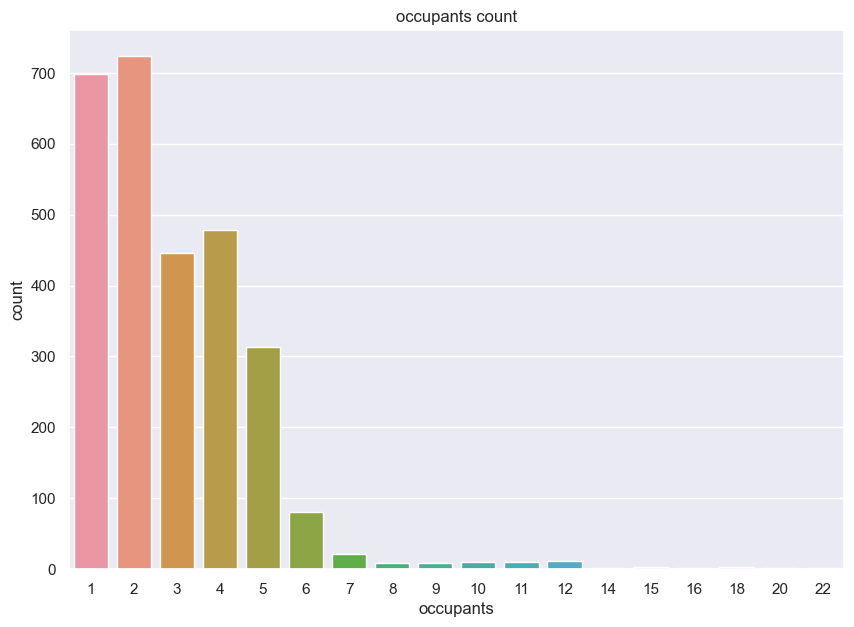

In [122]:
plt.figure(figsize=(10,7))
occupant_plot = sns.countplot(x ='occupants', data = home_occupancy)#plotting of a countplot of occupants
occupant_plot.set_title ('occupants count')

### OCCUPATION CALCULATION

In [123]:
def occupation_grouping(occup): #developing a function to categorize all the types of jobs in the dataset
    if occup == 'PhD Student': #when occup is a phd student
        occup = 'University Student'#the function returns university student when the occupation is a phd student
    if 'Retired' in occup: #when occup is retired
        occup = 'Retired' ##the function returns retired when the occupation is retired
    if 'Unemployed' in occup: #if occup is unemployed
        occup = 'Unemployed' ##the function returns unemployed when the occupation is unemployed
    if occup not in ['University Student', 'Student','Retired','Unemployed','Child']:
        occup = 'Employed'#if the occup does not match any of these listed items , it is classified as employed
    else:
        pass
    return occup

In [125]:
census_data['Job_Status']=census_data['Occupation'].map(occupation_grouping)#creating a new column in the dataset;dataframe that categorizes jobstatus based on occupation

In [126]:
census_data['Job_Status']

0         Employed
1         Employed
2       Unemployed
3          Retired
4         Employed
           ...    
8324    Unemployed
8325      Employed
8326      Employed
8327         Child
8328      Employed
Name: Job_Status, Length: 8328, dtype: object

In [127]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range,Job_Status
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,45-49,Employed
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,50-54,Employed
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,65-69,Unemployed
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,70-74,Retired
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,35-39,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim,55-59,Unemployed
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian,40-44,Employed
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian,40-44,Employed
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,Below Age,Female,Child,None,None,NaN,Child


In [128]:
census_data["Job_Status"].value_counts(normalize=True)*100 #The percentage distribution of the job status column

Employed              53.037944
Student               20.040826
Retired                7.877041
University Student     6.880403
Unemployed             6.159942
Child                  6.003842
Name: Job_Status, dtype: float64

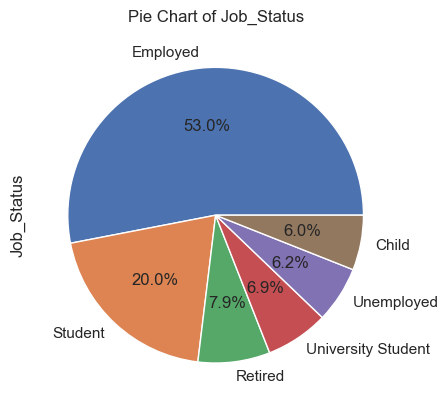

In [129]:
counts = census_data['Job_Status'].value_counts()


percentages = counts.div(len(census_data['Job_Status'])) * 100 # Get the percentages by dividing the counts by the total number of values


percentages.plot.pie(autopct='%1.1f%%')# Create a pie chart of the percentages

plt.title('Pie Chart of Job_Status')#title of the pie chart

plt.show()# Display the chart

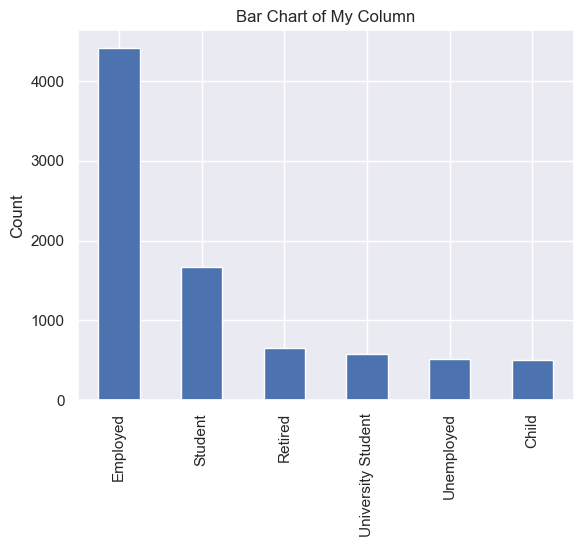

In [130]:
counts = census_data['Job_Status'].value_counts()
counts.plot.bar()

plt.xticks(range(len(counts.index)), counts.index)# Setting the x-axis labels to the unique values in the column

plt.ylabel('Count')# Setting the y-axis label to the count of values in the column

plt.title('Bar Chart of My Column')# we will Add a title to the chart

plt.show()# Display the chart





